# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [18]:
dataset = pd.read_csv("Iris.csv")
X = dataset.values

## Encoding categorical data

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 3.5, 1.4, 0.2],
       [1.0, 0.0, 0.0, ..., 3.0, 1.4, 0.2],
       [1.0, 0.0, 0.0, ..., 3.2, 1.3, 0.2],
       ...,
       [0.0, 0.0, 1.0, ..., 3.0, 5.2, 2.0],
       [0.0, 0.0, 1.0, ..., 3.4, 5.4, 2.3],
       [0.0, 0.0, 1.0, ..., 3.0, 5.1, 1.8]], dtype=object)

## Using the elbow method to find the optimal number of clusters

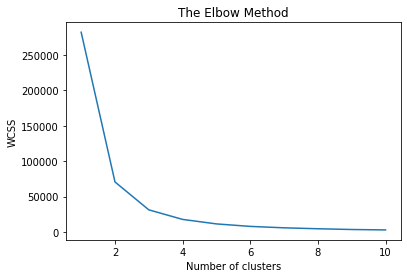

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can select 3 or 4 Cluster as per the Elbo Method.

## Training the K-Means model on the dataset

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [23]:
dataset["Cluster"] = y_kmeans
cluster_data = dataset.groupby(by = "Cluster").mean()
cluster_data["Count"] = [(dataset.Cluster[dataset.Cluster == 0]).count(),(dataset.Cluster[dataset.Cluster == 1]).count(),(dataset.Cluster[dataset.Cluster == 2]).count()]
cluster_data = cluster_data.drop(columns="Id")

In [26]:
cluster_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Count
Cluster,,,,,
0,5.922000,2.780000,4.206000,1.304000,50
1,6.570588,2.970588,5.523529,2.011765,51
2,5.006122,3.420408,1.465306,0.244898,49


# Conclusion

> Here we have divided data in three clusters which contain almost the same no of records which is considered as best dataset structure.

